<a href="https://colab.research.google.com/github/Rodolfoxxv/GrayScale50/blob/main/ppm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pillow numpy matplotlib

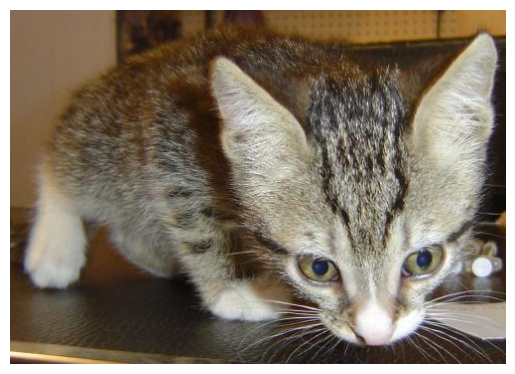

In [ ]:
from PIL import Image # Apenas para indicar o caminho
import numpy as np # Apenas para podermos ver a imagem
import matplotlib.pyplot as plt # Apenas para podermos ver a imagem

####### O ultimo código é sem biblioteca  ######


caminho = 'imagens/300.ppm'

imagem = Image.open(caminho)

# Vamos ver a imagem que vamos usar
plt.imshow(imagem)
plt.axis('off')
plt.show()


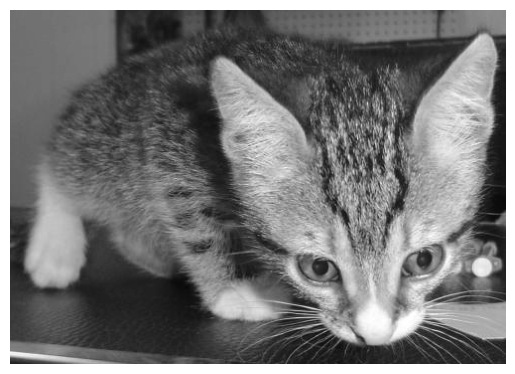

In [68]:
# Convertendo para Cinza
def mostrar_imagem_cinza(caminho_arquivo):
    """Convete a imagem PPM em escala de cinza"""
    with open(caminho_arquivo, 'r') as f:
        tipo = f.readline().strip()
        if tipo != 'P3':
            raise ValueError("Formato PPM não suportado (deve ser P3).")

        while True:
            linha = f.readline().strip()
            if not linha.startswith('#'):
                break

        largura, altura = map(int, linha.split())
        max_cor = int(f.readline().strip())

        if max_cor != 255:
            raise ValueError("Somente valores máximos de cor 255 são suportados.")

        pixels = []
        for linha in f:
            pixels.extend(map(int, linha.split()))

    # escala de cinza
    imagem_cinza = np.zeros((altura, largura), dtype=np.uint8)
    for y in range(altura):
        for x in range(largura):
            i = (y * largura + x) * 3
            r, g, b = pixels[i], pixels[i + 1], pixels[i + 2]

            # Cinza (0 a 255)
            intensidade_cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
            imagem_cinza[y, x] = intensidade_cinza


    plt.imshow(imagem_cinza, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()


mostrar_imagem_cinza(caminho)


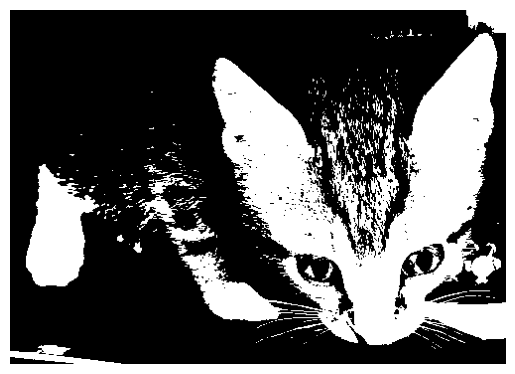

In [69]:
# Agora para Binario (preto e branco)
def mostrar_imagem_binaria(caminho_arquivo, limiar=128):
    """A imagem PPM em preto e branco."""
    with open(caminho_arquivo, 'r') as f:

        tipo = f.readline().strip()
        if tipo != 'P3':
            raise ValueError("Formato PPM não suportado (deve ser P3).")


        while True:
            linha = f.readline().strip()
            if not linha.startswith('#'):
                break


        largura, altura = map(int, linha.split())
        max_cor = int(f.readline().strip())

        if max_cor != 255:
            raise ValueError("Somente valores máximos de cor 255 são suportados.")


        pixels = []
        for linha in f:
            pixels.extend(map(int, linha.split()))

    # Matriz binaria
    imagem_pb = np.zeros((altura, largura), dtype=np.uint8)
    for y in range(altura):
        for x in range(largura):
            i = (y * largura + x) * 3
            r, g, b = pixels[i], pixels[i + 1], pixels[i + 2]


            intensidade_cinza = int(0.299 * r + 0.587 * g + 0.114 * b)

            # binarizar (0 ou 255)
            if intensidade_cinza > limiar:
                imagem_pb[y, x] = 255 # Aqui Branco
            else:
                imagem_pb[y, x] = 0 # Aqui Preto


    plt.imshow(imagem_pb, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()


mostrar_imagem_binaria(caminho)


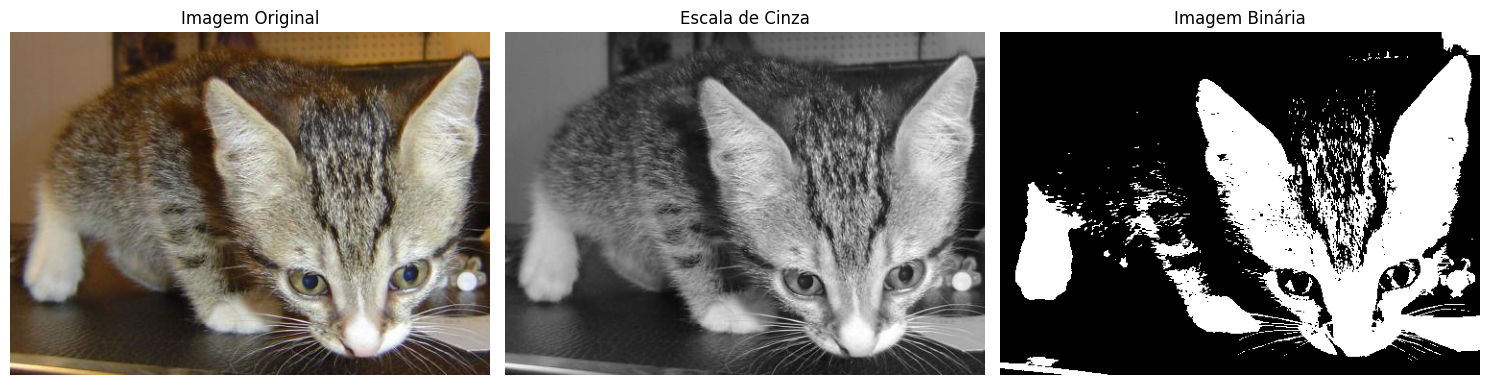

In [70]:
# Vamos comparar a três imagens
def mostrar_imagem(caminho_arquivo, limiar=128, grid_size=10):
    """Lê e exibe as imagens PPM nos formatos original, escala de cinza e binarizado com linhas de grade."""
    with open(caminho_arquivo, 'r') as f:
        tipo = f.readline().strip()
        if tipo != 'P3':
            raise ValueError("Formato PPM não suportado (deve ser P3).")


        while True:
            linha = f.readline().strip()
            if not linha.startswith('#'):
                break


        largura, altura = map(int, linha.split())
        max_cor = int(f.readline().strip())

        if max_cor != 255:
            raise ValueError("Somente valores máximos de cor 255 são suportados.")


        pixels = []
        for linha in f:
            pixels.extend(map(int, linha.split()))

    # Criar as matrizes
    imagem_original = np.zeros((altura, largura, 3), dtype=np.uint8)
    imagem_cinza = np.zeros((altura, largura), dtype=np.uint8)
    imagem_pb = np.zeros((altura, largura), dtype=np.uint8)

    for y in range(altura):
        for x in range(largura):
            i = (y * largura + x) * 3
            r, g, b = pixels[i], pixels[i + 1], pixels[i + 2]


            imagem_original[y, x] = [r, g, b]


            intensidade_cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
            imagem_cinza[y, x] = intensidade_cinza

            # Binarizar
            if intensidade_cinza > limiar:
                imagem_pb[y, x] = 255
            else:
                imagem_pb[y, x] = 0


    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Original
    axs[0].imshow(imagem_original)
    axs[0].set_title("Imagem Original")
    axs[0].axis('off')


    # Escala de Cinza
    axs[1].imshow(imagem_cinza, cmap='gray', vmin=0, vmax=255)
    axs[1].set_title("Escala de Cinza")
    axs[1].axis('off')

    # Binária
    axs[2].imshow(imagem_pb, cmap='gray', vmin=0, vmax=255)
    axs[2].set_title("Imagem Binária")
    axs[2].axis('off')




    plt.tight_layout()
    plt.show()


mostrar_imagem(caminho)

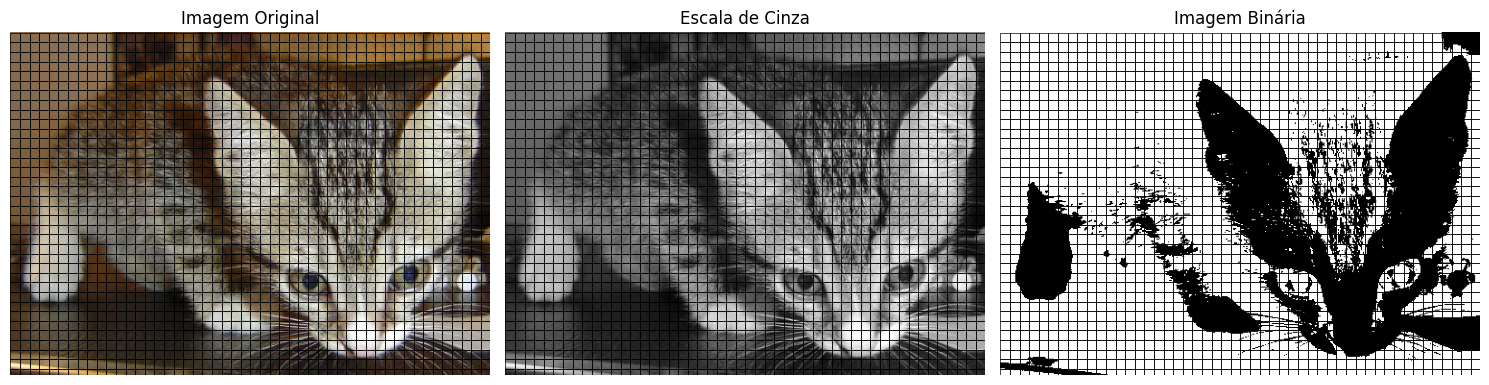

In [31]:
# Agora vamos simular a divisão da matrix em pixels
def mostrar_imagem_com_quadrados(caminho_arquivo, limiar=128, grid_size=10):
    """Lê e exibe a imagem PPM com cada pixel dentro de um quadradinho, mostrando as versões original, escala de cinza e binarizada."""
    with open(caminho_arquivo, 'r') as f:

        tipo = f.readline().strip()
        if tipo != 'P3':
            raise ValueError("Formato PPM não suportado (deve ser P3).")


        while True:
            linha = f.readline().strip()
            if not linha.startswith('#'):
                break


        largura, altura = map(int, linha.split())
        max_cor = int(f.readline().strip())

        if max_cor != 255:
            raise ValueError("Somente valores máximos de cor 255 são suportados.")


        pixels = []
        for linha in f:
            pixels.extend(map(int, linha.split()))


    imagem_original = np.zeros((altura, largura, 3), dtype=np.uint8)
    imagem_cinza = np.zeros((altura, largura), dtype=np.uint8)
    imagem_pb = np.zeros((altura, largura), dtype=np.uint8)

    for y in range(altura):
        for x in range(largura):
            i = (y * largura + x) * 3
            r, g, b = pixels[i], pixels[i + 1], pixels[i + 2]


            imagem_original[y, x] = [r, g, b]


            intensidade_cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
            imagem_cinza[y, x] = intensidade_cinza


            if intensidade_cinza > limiar:
                imagem_pb[y, x] = 255
            else:
                imagem_pb[y, x] = 0


    def plotar_com_quadrados(imagem, ax, titulo, cmap='gray'):
        ax.set_title(titulo)
        ax.imshow(imagem, cmap=cmap)
        ax.axis('off')

        ax.set_xticks(np.arange(0, largura, grid_size))
        ax.set_yticks(np.arange(0, altura, grid_size))
        ax.set_xticklabels([])
        ax.set_yticklabels([])


        for i in range(0, largura, grid_size):
            for j in range(0, altura, grid_size):
                ax.add_patch(plt.Rectangle((i, j), grid_size, grid_size, fill=None, edgecolor='black', linewidth=0.5))


    fig, axs = plt.subplots(1, 3, figsize=(15, 5))


    plotar_com_quadrados(imagem_original, axs[0], "Imagem Original", cmap=None)


    plotar_com_quadrados(imagem_cinza, axs[1], "Escala de Cinza", cmap='gray')


    plotar_com_quadrados(imagem_pb, axs[2], "Imagem Binária", cmap='binary')


    plt.tight_layout()
    plt.show()


mostrar_imagem_com_quadrados(caminho)


In [66]:
# Agora sem bibloteca so nos pixels
def ler_imagem_ppm(caminho_arquivo):
    """Lê uma imagem PPM e retorna os dados de pixels."""
    with open(caminho_arquivo, 'r') as f:
        tipo = f.readline().strip()
        if tipo != 'P3':
            raise ValueError("Formato PPM não suportado (deve ser P3).")


        while True:
            linha = f.readline().strip()
            if not linha.startswith('#'):
                break


        largura, altura = map(int, linha.split())
        max_cor = int(f.readline().strip())

        if max_cor != 255:
            raise ValueError("Somente valores máximos de cor 255 são suportados.")


        pixels = []
        for linha in f:
            pixels.extend(map(int, linha.split()))

    return largura, altura, pixels


def converter_para_cinza(largura, altura, pixels):
    """Converte os pixels para escala de cinza (0 a 255) usando a fórmula RGB para cinza."""
    imagem_cinza = []
    for i in range(0, len(pixels), 3):
        r, g, b = pixels[i], pixels[i + 1], pixels[i + 2]
        cinza = int(0.299 * r + 0.587 * g + 0.114 * b)
        imagem_cinza.append(cinza)
    return imagem_cinza


def binarizar_imagem(largura, altura, imagem_cinza, limiar=128):
    """Binariza a imagem (0 ou 255)."""
    imagem_binaria = []
    for valor in imagem_cinza:
        if valor > limiar:
            imagem_binaria.append(255)
        else:
            imagem_binaria.append(0)
    return imagem_binaria


def reduzir_imagem(largura, altura, imagem, escala=0.1):
    """
    Reduz a imagem mantendo a escala.
    :param largura: Largura original da imagem.
    :param altura: Altura original da imagem.
    :param imagem: Lista de pixels da imagem (escala de cinza ou binária).
    :param escala: Fator de escala para redimensionar a imagem.
    :return: Nova largura, nova altura e pixels reduzidos.
    """
    nova_largura = max(1, int(largura * escala))
    nova_altura = max(1, int(altura * escala))
    imagem_reduzida = []

    for y in range(nova_altura):
        for x in range(nova_largura):

            origem_x = int(x / escala)
            origem_y = int(y / escala)
            indice = origem_y * largura + origem_x
            imagem_reduzida.append(imagem[indice])

    return nova_largura, nova_altura, imagem_reduzida


def exibir_imagem_terminal(largura, altura, imagem):
    """
    Imagens 50 tons de cinza e mantendo preto e branco.

    :param largura: Largura da imagem.
    :param altura: Altura da imagem.
    :param imagem: Lista de pixels (escala de cinza ou binária).
    """
    for y in range(altura):
        for x in range(largura):
            intensidade = imagem[y * largura + x]


            if intensidade == 0:
                print(f"\033[48;5;232m  \033[m", end="")
            elif intensidade == 255:
                print(f"\033[48;5;255m  \033[m", end="")
            else:
                # Escala de cinza (50 tons de cinza)
                tom_de_cinza = int((intensidade / 255) * 49)
                print(f"\033[48;5;{232 + tom_de_cinza}m  \033[m", end="")
        print()




largura, altura, pixels = ler_imagem_ppm(caminho)


imagem_cinza = converter_para_cinza(largura, altura, pixels)


imagem_binaria = binarizar_imagem(largura, altura, imagem_cinza)


escala = 0.05

print("Imagem em Escala de 50 tons de Cinza:")
nova_largura, nova_altura, imagem_reduzida_cinza = reduzir_imagem(largura, altura, imagem_cinza, escala)
exibir_imagem_terminal(nova_largura, nova_altura, imagem_reduzida_cinza)

print("\nImagem Binária:")
nova_largura_bin, nova_altura_bin, imagem_reduzida_binaria = reduzir_imagem(largura, altura, imagem_binaria, escala)
exibir_imagem_terminal(nova_largura_bin, nova_altura_bin, imagem_reduzida_binaria)


Imagem em Escala de 50 tons de Cinza:
                                                  
                                                  
                                                  
                                                  
                                                  
                                                  
                                                  
                                                  
                                                  
                                                  
                                                  
                                                  
                                                  
                                                  
                                                  
                                                  
                                                  

Imagem Binária:
                                                  
                           